In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

%matplotlib inline


In [10]:
from sklearn.datasets import fetch_20newsgroups

#categories = ['alt.atheism', 'comp.graphics', 'sci.space']
categories = None
data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)


In [11]:
type(data_train)
type(data_test)

sklearn.utils.Bunch

In [12]:
print(data_train.target)
print (data_test.target)


[7 4 4 ... 3 1 8]
[ 7  5  0 ...  9  6 15]


In [9]:
print (data_train.target_names)
print (data_test.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print (len(data_train.data))
print (len(data_test.data))

11314
7532


In [14]:
print(type(data_train.data))
print(type(data_train.target))

# Test data type
print(type(data_test.data))
print(type(data_test.target))

<type 'list'>
<type 'numpy.ndarray'>
<type 'list'>
<type 'numpy.ndarray'>


In [15]:
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data) 

In [16]:
# Train data type
print (type(data_train_vectors.data))
print (type(data_train.target))

# Test data type
print (type(data_train_vectors.data))
print (type(data_train.target))


<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [17]:
print (data_train_vectors.shape)


(11314, 101631)


In [18]:
# vérifier la forme du résultat (dimension unique correspondant au nombre d'observations)
print (data_train.target.shape)



(11314,)


In [19]:
Xtr = data_train_vectors
print ("Xtr:\n", Xtr)
# stocker le vecteur du résultat à la formation dans "ytr"
ytr = data_train.target
print ("ytr:",ytr)

('Xtr:\n', <11314x101631 sparse matrix of type '<type 'numpy.float64'>'
	with 1103627 stored elements in Compressed Sparse Row format>)
('ytr:', array([7, 4, 4, ..., 3, 1, 8]))


In [20]:
Xtt = data_test_vectors
print ("Xtt:\n", Xtt)

# stocker le vecteur ddu résultat aux tests dans "ytt"
ytt = data_test.target
print ("ytt:",ytt)

('Xtt:\n', <7532x101631 sparse matrix of type '<type 'numpy.float64'>'
	with 665738 stored elements in Compressed Sparse Row format>)
('ytt:', array([ 7,  5,  0, ...,  9,  6, 15]))


In [21]:
# importer le module requis depuis scikit learn
from sklearn.naive_bayes import MultinomialNB


In [22]:
# Implémentation d'un modèle de classification - à l'aide de MultinomialNB

# Instancier l'estimateur
clf_MNB = MultinomialNB(alpha=.01)

# Ajuster le modèle avec des données (alias "formation de modèle")
clf_MNB.fit(Xtr, ytr)

# Prédire le résultat pour une nouvelle observation
y_pred = clf_MNB.predict(Xtt)
print ("Predicted Class Labels:",y_pred)

# Prédire le score du résultat pour une nouvelle observation
y_pred_score_mnb = clf_MNB.predict_proba(Xtt)
print ("Predicted Score:\n",y_pred_score_mnb)

('Predicted Class Labels:', array([ 7,  1, 15, ..., 11, 12, 15]))
('Predicted Score:\n', array([[2.33922785e-03, 8.00299678e-02, 5.93857193e-03, ...,
        2.58534569e-03, 6.01529617e-03, 6.78500079e-04],
       [4.09205377e-04, 8.04813630e-01, 1.13113063e-02, ...,
        1.04980678e-03, 3.35421853e-03, 1.16458819e-03],
       [1.10022079e-01, 2.82942568e-02, 7.20466138e-02, ...,
        5.75209783e-02, 6.36329151e-02, 9.95471475e-02],
       ...,
       [1.67251951e-02, 6.17838347e-03, 2.72529039e-03, ...,
        4.08349633e-02, 9.15576372e-02, 1.31169817e-02],
       [5.24325557e-07, 1.91154890e-02, 2.66689839e-03, ...,
        4.54799138e-07, 1.10886936e-06, 6.03922247e-06],
       [3.69430453e-01, 1.14028576e-04, 6.52564849e-05, ...,
        1.64443397e-03, 2.64732509e-02, 9.27623133e-02]]))


In [23]:
# importer le module requis
from sklearn.model_selection import cross_val_score


In [24]:
# Validation croisée 10 fois avec le modèle MNB
clf_mnb = MultinomialNB(alpha=.01)
print "MultinomialNB 10-Cross Validation Score:",cross_val_score(clf_mnb, Xtr, ytr, cv=10, scoring='accuracy').mean()



MultinomialNB 10-Cross Validation Score: 0.7739393256509762


In [26]:
# importation du module requis
from sklearn.model_selection import GridSearchCV



In [27]:
# définir les valeurs des paramètres à rechercher pour MNB
alpha = [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

print alpha

[0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [28]:
# créer une grille de paramètres: mappez les noms des paramètres aux valeurs à rechercher pour MNB
param_grid = dict(alpha=alpha)
print param_grid

{'alpha': [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [29]:
# instancier la grille
grid = GridSearchCV(clf_mnb, param_grid, cv=10, scoring='accuracy')

In [28]:
# définir les valeurs des paramètres à rechercher pour MNB
alpha = [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

print (alpha)


[0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [30]:
# adapter la grille aux données
grid.fit(Xtr, ytr)

/home/wassila/.local/lib/python2.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
# examiner le meilleur modèle
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)



0.7739084320311119
{'alpha': 0.01}
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


In [37]:
# importation du module requis
from sklearn import metrics

In [38]:
# Instancier l'estimateur
clf_MNB = MultinomialNB(alpha=.01)

# Ajuster le modèle avec des données (alias "formation de modèle")
clf_MNB.fit(Xtr, ytr)

# Prédire le résultat pour une nouvelle observation
y_pred_mnb = clf_MNB.predict(Xtt)
print "Predicted Class Labels:",y_pred_mnb

# calculer la précision
print "Classification Accuracy:",metrics.accuracy_score(ytt, y_pred_mnb)

Predicted Class Labels: [ 7  1 15 ... 11 12 15]
Classification Accuracy: 0.7002124269782263


In [39]:
# le premier argument correspond aux valeurs vraies, le deuxième argument correspond aux valeurs prédites
print metrics.confusion_matrix(ytt, y_pred_mnb)

[[141   1   2   2   1   2   0   3   5   2  10   4   1   2  10  79  12  13
   10  19]
 [  4 278  10  16  16  24   4   0   3   1   5  11   3   1   7   4   0   2
    0   0]
 [  4  26 205  65  10  24   3   1   5   0  16  12   2   3   7   2   0   1
    5   3]
 [  0  11  27 279  32   2   9   4   0   0   8   3  17   0   0   0   0   0
    0   0]
 [  0  11   7  33 268   3   8   6   2   0  15   6  15   2   6   1   2   0
    0   0]
 [  0  46  14   7   6 293   4   0   0   1   5   7   5   2   3   1   1   0
    0   0]
 [  0   3   1  30  21   0 280  15   7   2  11   1   8   1   6   1   2   0
    1   0]
 [  1   1   1   1   0   0   8 289  31   0  24   4   9   3   6   3   6   2
    7   0]
 [  6   2   1   1   2   2   5  28 292   2  13   0   8   6   4   6  10   3
    6   1]
 [  5   3   0   0   0   1   5   0   4 321  30   4   1   4   3   5   3   2
    6   0]
 [  4   0   0   0   0   1   0   1   2   5 373   3   0   1   2   6   1   0
    0   0]
 [  1  12   5   3   3   1   1   0   4   3  16 298   3   1   5   7

In [40]:
print ("Classification Error of MultinomialNB:", 1 - metrics.accuracy_score(ytt, y_pred_mnb))

('Classification Error of MultinomialNB:', 0.2997875730217737)


In [41]:
print ("Sensitivity of MultinomialNB:",metrics.recall_score(ytt, y_pred_mnb, average='weighted'))

('Sensitivity of MultinomialNB:', 0.7002124269782263)


In [42]:
print ("Precision of MultinomialNB:", metrics.precision_score(ytt, y_pred_mnb, average='weighted'))

('Precision of MultinomialNB:', 0.7081956398923036)


In [43]:
print ("F-measure of MultinomialNB:", metrics.f1_score(ytt, y_pred_mnb, average='weighted'))

('F-measure of MultinomialNB:', 0.6943152318354207)


In [45]:
# importation des modules requis
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [50]:
def ROC_multi_class(Xtr, ytr, Xtt, ytt, clf):
    
    classes = [0,1, 2, 3, 4]
   # Binariser la sortie
    ytr = label_binarize(ytr, classes=classes)
    n_classes = ytr.shape[1]
    
   # Apprenez à prédire chaque classe par rapport à l'autre
    classifier = OneVsRestClassifier(clf)
    classifier.fit(Xtr, ytr)
    if (clf == clf_MNB):
       
        y_pred_score = classifier.predict_proba(Xtt)
    
    ytt = label_binarize(ytt, classes=classes)
    
 # Calculer la courbe ROC et la zone ROC pour chaque classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytt[:, i], y_pred_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    # Tracer les courbes ROC pour la multiclasse
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i+1, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of multi-class')
    plt.legend(loc="lower right")
    plt.show()

ROC and AUC of MultinomialNB


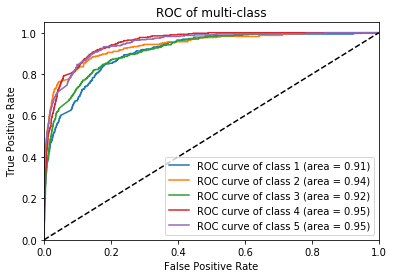

In [51]:
# ROC pour MultinomialNB
print "ROC and AUC of MultinomialNB"
ROC_multi_class(Xtr, ytr, Xtt, ytt, clf_MNB)

In [52]:
# importation du module requis
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



In [55]:
def PR_multi_class(Xtr, ytr, Xtt, ytt, clf):
    
    classes = [0,1, 2, 3, 4]
   # Binariser la sortie
    ytr = label_binarize(ytr, classes=classes)
    n_classes = ytr.shape[1]
    
    # Apprenez à prédire chaque classe par rapport à l'autre
    classifier = OneVsRestClassifier(clf)
    classifier.fit(Xtr, ytr)
    if (clf == clf_MNB):
       
        y_pred_score = classifier.predict_proba(Xtt)
    
    ytt = label_binarize(ytt, classes=classes)
    
# Compute Precision-Recall et courbe de tracé
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(ytt[:, i], y_pred_score[:, i])
        average_precision[i] = average_precision_score(ytt[:, i], y_pred_score[:, i])
    
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label='PR curve of class {0} (area = {1:0.2f})'
                       ''.format(i+1, average_precision[i]))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve of multi-class')
    plt.legend(loc="lower right")
    plt.show()

PR and AUC of MultinomialNB


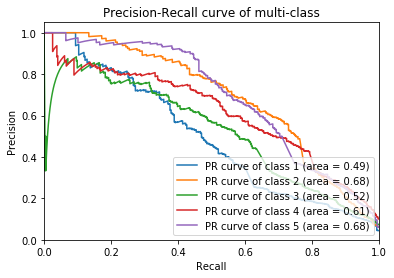

In [56]:
# Courbe PR de MultinomialNB
print "PR and AUC of MultinomialNB"
PR_multi_class(Xtr, ytr, Xtt, ytt, clf_MNB)